# **Data context**

The dataset consists of 5302 transactions made by various customers with
various counter parties. Some of these transactions have been labeled as fraudulent or suspicious under the column **fraud_flag**.




# **Data content**

The csv file consists of 9 fields. The description of each field is as below:



* **customer**: id of a customer
* **customer_country**: country of a customer
* **fraud_flag**: target column, verifies whether transaction was fraudulent
* **timestamp**: time of transaction with detailed time and date
* **counterparty**: id of a counterparty
* **counterparty_country**: country of a counterparty
* **type**: type of a transaction
* **ccy**: currency of a transaction
* **amount**: amount of a transaction



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTENC

from joblib import dump, load
import joblib

warnings.filterwarnings('ignore')

from google.colab import drive, files
import os

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all_trxns.csv")

# **EDA**

In [ ]:
# Shape of data
df.shape

(5302, 9)

In [ ]:
# First 5 rows of data
df.head()

,customer,customer_country,fraud_flag,timestamp,counterparty,counterparty_country,type,ccy,amount
0,C12976926337644,UK,N,3/20/21 5:59,7.769740e+13,CN,OTHER,JPY,48625.25
1,C12976926337644,UK,N,5/2/21 3:00,7.769740e+13,CN,PAYMENT,GBP,20637.21
2,C12976926337644,UK,N,5/23/21 22:15,7.769740e+13,NaN,PAYMENT,USD,56691.27
3,C12976926337644,UK,N,7/7/21 21:36,7.769740e+13,NaN,PAYMENT,CNY,343864.71
4,C12976926337644,UK,N,9/2/21 0:14,7.769740e+13,NaN,PAYMENT,USD,57247.35


In [ ]:
# Last 5 rows of data
df.tail()

,customer,customer_country,fraud_flag,timestamp,counterparty,counterparty_country,type,ccy,amount
5297,R85394663171656,UK,N,12/20/21 0:34,8.863590e+13,UK,INTEREST,GBP,25774.25
5298,R85394663171656,UK,N,12/23/21 17:49,8.863590e+13,UK,INTEREST,GBP,25660.33
5299,R85394663171656,UK,N,1/18/21 15:14,8.863590e+13,UK,OTHER,GBP,32242.92
5300,R85394663171656,UK,N,4/3/21 0:13,8.863590e+13,UK,OTHER,GBP,32139.62
5301,R85394663171656,UK,N,9/3/21 18:32,8.863590e+13,NaN,OTHER,CNY,17784.71


In [ ]:
# Check duplicates - there are no duplicates
print(len(df[df.duplicated()]))

0


In [ ]:
# Columns names
df.columns

Index(['customer', 'customer_country', 'fraud_flag', 'timestamp',
       'counterparty', 'counterparty_country', 'type', 'ccy', 'amount'],
      dtype='object')

In [ ]:
# Data types
df.dtypes

customer                 object
customer_country         object
fraud_flag               object
timestamp                object
counterparty            float64
counterparty_country     object
type                     object
ccy                      object
amount                   object
dtype: object

In [ ]:
# Unique values in each column
pd.Series({c: df[c].unique() for c in df})

customer                [C12976926337644, C14368611669296, C1769455385...
customer_country                                             [UK, US, SG]
fraud_flag                                                         [N, Y]
timestamp               [3/20/21 5:59, 5/2/21 3:00, 5/23/21 22:15, 7/7...
counterparty            [77697400000000.0, 26798400000000.0, 159924000...
counterparty_country    [CN, nan, DE, FR, UK, BR, JP, IN, SG, HK, US, ...
type                    [OTHER, PAYMENT, TT, BILLING, DIVIDEND, TRANSF...
ccy                         [JPY, GBP, USD, CNY, BRL, EUR, INR, HKD, SGD]
amount                  [48625.25, 20637.21, 56691.27, 343864.71, 5724...
dtype: object

In [ ]:
# Unique value for each column
df.nunique()

customer                 100
customer_country           3
fraud_flag                 2
timestamp               5265
counterparty             381
counterparty_country      12
type                       8
ccy                        9
amount                  5141
dtype: int64

In [ ]:
# Check missing values, only counterparty_country column has 499 missing values
df.isna().sum()

customer                  0
customer_country          0
fraud_flag                0
timestamp                 0
counterparty              0
counterparty_country    499
type                      0
ccy                       0
amount                    0
dtype: int64

In [ ]:
# Data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer              5302 non-null   object 
 1   customer_country      5302 non-null   object 
 2   fraud_flag            5302 non-null   object 
 3   timestamp             5302 non-null   object 
 4   counterparty          5302 non-null   float64
 5   counterparty_country  4803 non-null   object 
 6   type                  5302 non-null   object 
 7   ccy                   5302 non-null   object 
 8   amount                5302 non-null   object 
dtypes: float64(1), object(8)
memory usage: 372.9+ KB


In [ ]:
# Change names of columns to shorter ones
df.rename(columns={"customer_country": "cus_country", "counterparty_country": "cty_country", "fraud_flag": "fraud"}, inplace=True)
df.columns

Index(['customer', 'cus_country', 'fraud', 'timestamp', 'counterparty',
       'cty_country', 'type', 'ccy', 'amount'],
      dtype='object')

In [ ]:
# Dataset is completely imbalanced - 5211 non fraud transactions vs 91 fraud
df['fraud'].value_counts()

N    5211
Y      91
Name: fraud, dtype: int64

In [ ]:
# Each counterparty country has similar amount of transactions except from United States and USA with significantly lower amount (below 100)
df['cty_country'].value_counts()

CN               619
UK               614
JP               537
US               494
DE               484
FR               455
HK               453
BR               392
SG               375
IN               340
United States     23
USA               17
Name: cty_country, dtype: int64

In [ ]:
# The UK has the highest amount of customers, SG - the smallest
df['cus_country'].value_counts()

UK    2112
US    1795
SG    1395
Name: cus_country, dtype: int64

In [ ]:
# Similar amounts of transactions for each type
df['type'].value_counts()

TRANSFER      716
TT            705
DIVIDEND      691
INTEREST      665
OTHER         649
PAYMENT       633
INVESTMENT    627
BILLING       616
Name: type, dtype: int64

In [ ]:
# The most transactions were in GBP and USD, the least amount in BRL and INR
df['ccy'].value_counts()

GBP    1191
USD    1034
SGD     830
EUR     590
CNY     389
JPY     378
HKD     325
BRL     318
INR     247
Name: ccy, dtype: int64

In [ ]:
# Drop columns customer and counterparty - no significant meaning for further analysis
df.drop(columns=['customer', 'counterparty'], inplace=True)
df.head()

,cus_country,fraud,timestamp,cty_country,type,ccy,amount
0,UK,N,3/20/21 5:59,CN,OTHER,JPY,48625.25
1,UK,N,5/2/21 3:00,CN,PAYMENT,GBP,20637.21
2,UK,N,5/23/21 22:15,NaN,PAYMENT,USD,56691.27
3,UK,N,7/7/21 21:36,NaN,PAYMENT,CNY,343864.71
4,UK,N,9/2/21 0:14,NaN,PAYMENT,USD,57247.35


In [ ]:
# Extract only digits from amount column and change type to numerical
df['amount'] = df['amount'].str.extract('(\d+)')
df['amount'] = pd.to_numeric(df['amount'])
df.head()

,cus_country,fraud,timestamp,cty_country,type,ccy,amount
0,UK,N,3/20/21 5:59,CN,OTHER,JPY,48625
1,UK,N,5/2/21 3:00,CN,PAYMENT,GBP,20637
2,UK,N,5/23/21 22:15,NaN,PAYMENT,USD,56691
3,UK,N,7/7/21 21:36,NaN,PAYMENT,CNY,343864
4,UK,N,9/2/21 0:14,NaN,PAYMENT,USD,57247


In [ ]:
# Get year, month and day from timestamp column, finally drop timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df.drop(columns=['timestamp'], inplace=True)
df.head()

,cus_country,fraud,cty_country,type,ccy,amount,year,month,day
0,UK,N,CN,OTHER,JPY,48625,2021,3,20
1,UK,N,CN,PAYMENT,GBP,20637,2021,5,2
2,UK,N,NaN,PAYMENT,USD,56691,2021,5,23
3,UK,N,NaN,PAYMENT,CNY,343864,2021,7,7
4,UK,N,NaN,PAYMENT,USD,57247,2021,9,2


In [ ]:
# Fill missing values in counterparty_country column by mode
df['cty_country'] = df['cty_country'].fillna(df['cty_country'].mode()[0])

In [ ]:
# Check missing values - they do not exist
df.isna().sum()

cus_country    0
fraud          0
cty_country    0
type           0
ccy            0
amount         0
year           0
month          0
day            0
dtype: int64

In [ ]:
# Check the amount after transformation
df['cty_country'].value_counts()

CN               1118
UK                614
JP                537
US                494
DE                484
FR                455
HK                453
BR                392
SG                375
IN                340
United States      23
USA                17
Name: cty_country, dtype: int64

In [ ]:
# Change the type for cus_country, fraud, cty_country, type and ccy to categorical
df['cus_country'] = df['cus_country'].astype('category')
df['cty_country'] = df['cty_country'].astype('category')
df['type'] = df['type'].astype('category')
df['ccy'] = df['ccy'].astype('category')
df['fraud'] = df['fraud'].astype('category')

In [ ]:
# Check the details after change - less memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   cus_country  5302 non-null   category
 1   fraud        5302 non-null   category
 2   cty_country  5302 non-null   category
 3   type         5302 non-null   category
 4   ccy          5302 non-null   category
 5   amount       5302 non-null   int64   
 6   year         5302 non-null   int64   
 7   month        5302 non-null   int64   
 8   day          5302 non-null   int64   
dtypes: category(5), int64(4)
memory usage: 193.1 KB


In [ ]:
# Statistics for categorical data
df.describe(include='category').T

,count,unique,top,freq
cus_country,5302,3,UK,2112
fraud,5302,2,N,5211
cty_country,5302,12,CN,1118
type,5302,8,TRANSFER,716
ccy,5302,9,GBP,1191


In [ ]:
# Statistics for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,5302.0,495555.906639,1.531093e+06,1.0,26460.75,50661.5,99774.5,12772515.0
year,5302.0,2021.000754,2.745916e-02,2021.0,2021.00,2021.0,2021.0,2022.0
month,5302.0,6.484346,3.430838e+00,1.0,3.00,7.0,9.0,12.0
day,5302.0,15.980008,8.802705e+00,1.0,8.00,16.0,24.0,31.0


In [ ]:
# Details for fraud and non fraud transactions for numerical columns
df.groupby(by = 'fraud').mean()

,amount,year,month,day
fraud,,,,
N,493904.780464,2021.000768,6.476492,15.975245
Y,590105.560440,2021.000000,6.934066,16.252747


In [ ]:
# Details for numerical columns - the highest are highlighted in red
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
amount,5302.000000,495555.906639,1531093.273011,1.000000,26460.750000,50661.500000,99774.500000,12772515.000000
year,5302.000000,2021.000754,0.027459,2021.000000,2021.000000,2021.000000,2021.000000,2022.000000
month,5302.000000,6.484346,3.430838,1.000000,3.000000,7.000000,9.000000,12.000000
day,5302.000000,15.980008,8.802705,1.000000,8.000000,16.000000,24.000000,31.000000


In [ ]:
# The most fraud transactions were done by customers from UK, the least from US
pd.crosstab(index=df['fraud'], columns=df['cus_country'])

cus_country,SG,UK,US
fraud,,,
N,1366,2077,1768
Y,29,35,27


In [ ]:
# The most fraud transactions were for counterparty from CN, the least from USA and United States
pd.crosstab(index=df['fraud'], columns=df['cty_country'])

cty_country,BR,CN,DE,FR,HK,IN,JP,SG,UK,US,USA,United States
fraud,,,,,,,,,,,,
N,387,1089,480,453,451,338,512,369,603,489,17,23
Y,5,29,4,2,2,2,25,6,11,5,0,0


In [ ]:
# The most fraud transactions have been done in CNY, the least in HKD
pd.crosstab(index=df['fraud'], columns=df['ccy'])

ccy,BRL,CNY,EUR,GBP,HKD,INR,JPY,SGD,USD
fraud,,,,,,,,,
N,312,367,585,1176,324,242,372,815,1018
Y,6,22,5,15,1,5,6,15,16


In [ ]:
# The most fraud transactions were of type PAYMENT, the least - BILLING and INTEREST
pd.crosstab(index=df['fraud'], columns=df['type'])

type,BILLING,DIVIDEND,INTEREST,INVESTMENT,OTHER,PAYMENT,TRANSFER,TT
fraud,,,,,,,,
N,614,688,663,609,637,596,708,696
Y,2,3,2,18,12,37,8,9


In [ ]:
# This table shows average amount of each fraud for each transaction type
# Rows represent fraud, the columns represent the different transaction types, and the entries are the average amount of transaction
pd.pivot_table(df, values='amount', index='fraud', columns='type', aggfunc=np.mean)

type,BILLING,DIVIDEND,INTEREST,INVESTMENT,OTHER,PAYMENT,TRANSFER,TT
fraud,,,,,,,,
N,452129.136808,4.169378e+05,428924.47813,678595.714286,2.638742e+05,548209.087248,634904.117232,527734.168103
Y,65271.000000,4.318597e+06,264327.00000,69576.888889,1.890356e+06,177685.108108,261293.125000,831473.777778


In [ ]:
# 91 fraud transactions have been done for the amount of 53,699,606, whereas genuine ones in the amount of 5211 - 2,573,737,811
df.groupby('fraud').agg(fraud=('fraud', 'count'), amount=('amount', 'sum')).round(2)

,fraud,amount
fraud,,
N,5211,2573737811
Y,91,53699606


In [ ]:
# 91 fraud transactions have been done for the amount of 53,699,606, whereas genuine ones in the amount of 5211 - 2,573,737,811
df.groupby('fraud').agg(fraud=('fraud', 'count'), amount=('amount', 'mean')).round(2)

,fraud,amount
fraud,,
0,5211,493904.78
1,91,590105.56


In [ ]:
# Group by cus_country and cty country - the most transactions for customers from UK and counterparty from CN
occur = df.groupby(['cus_country', 'cty_country'], as_index=False).size()
by_cus_and_cty_country = pd.DataFrame(occur)
print(by_cus_and_cty_country)

   cus_country    cty_country  size
0           SG             BR   110
1           SG             CN   273
2           SG             DE   188
3           SG             FR    19
4           SG             HK   127
5           SG             IN    35
6           SG             JP    70
7           SG             SG   209
8           SG             UK   175
9           SG             US   186
10          SG            USA     3
11          SG  United States     0
12          UK             BR   170
13          UK             CN   440
14          UK             DE   167
15          UK             FR   368
16          UK             HK   105
17          UK             IN   193
18          UK             JP   147
19          UK             SG    67
20          UK             UK   318
21          UK             US   113
22          UK            USA     9
23          UK  United States    15
24          US             BR   112
25          US             CN   405
26          US             D

In [ ]:
# Group by year and ccy - the most transactions in year 2021 and for currency GBP
occur = df.groupby(['year', 'ccy'], as_index=False).size()
by_year_and_ccy = pd.DataFrame(occur)
print(by_year_and_ccy)

    year  ccy  size
0   2021  BRL   318
1   2021  CNY   388
2   2021  EUR   590
3   2021  GBP  1190
4   2021  HKD   325
5   2021  INR   246
6   2021  JPY   378
7   2021  SGD   830
8   2021  USD  1033
9   2022  BRL     0
10  2022  CNY     1
11  2022  EUR     0
12  2022  GBP     1
13  2022  HKD     0
14  2022  INR     1
15  2022  JPY     0
16  2022  SGD     0
17  2022  USD     1


In [ ]:
# Group by year and type - the most transactions have been done in 2021 for type TRANSFER
occur = df.groupby(['year', 'type'], as_index=False).size()
by_year_and_type = pd.DataFrame(occur)
print(by_year_and_type)

    year        type  size
0   2021     BILLING   614
1   2021    DIVIDEND   691
2   2021    INTEREST   664
3   2021  INVESTMENT   627
4   2021       OTHER   648
5   2021     PAYMENT   633
6   2021    TRANSFER   716
7   2021          TT   705
8   2022     BILLING     2
9   2022    DIVIDEND     0
10  2022    INTEREST     1
11  2022  INVESTMENT     0
12  2022       OTHER     1
13  2022     PAYMENT     0
14  2022    TRANSFER     0
15  2022          TT     0


In [ ]:
df['fraud'] = df['fraud'].replace('N', 0).replace('Y', 1)
df_dum = pd.get_dummies(data=df, columns=['cus_country', 'cty_country', 'type', 'ccy'])
df_dum.head()

,fraud,amount,year,month,day,cus_country_SG,cus_country_UK,cus_country_US,cty_country_BR,cty_country_CN,...,type_TT,ccy_BRL,ccy_CNY,ccy_EUR,ccy_GBP,ccy_HKD,ccy_INR,ccy_JPY,ccy_SGD,ccy_USD
0,0,48625,2021,3,20,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,20637,2021,5,2,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,56691,2021,5,23,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,343864,2021,7,7,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,57247,2021,9,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

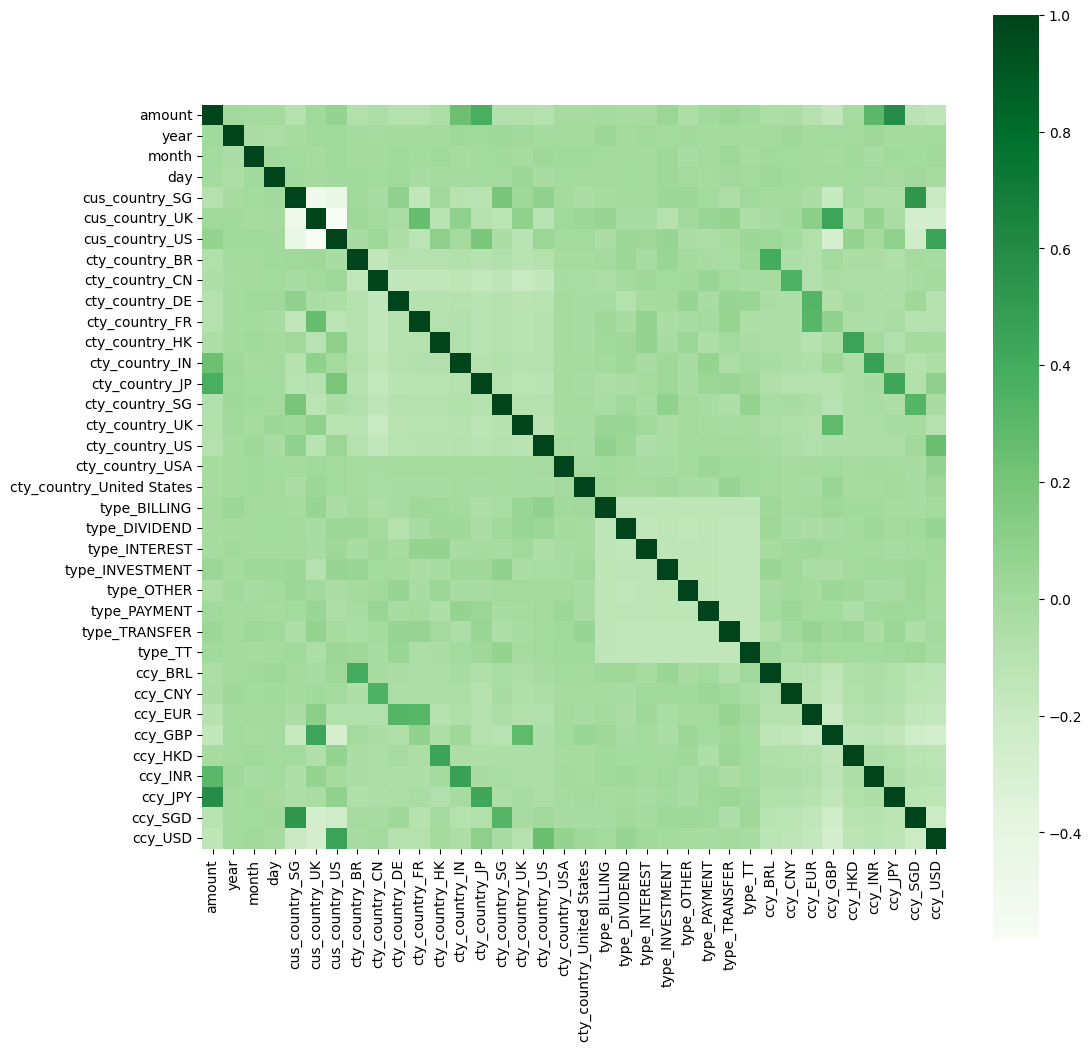

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,12))
count_corr = df_dum.corr()
sns.heatmap(count_corr, cbar=True, square= True, fmt='.2f', annot=False, annot_kws={'size':15}, cmap='Greens')

In [ ]:
# Peaeson correlation coefficients of each column compared to the target column fraud
# Some of them have moderate correlations with fraudulent and non-fraudulent transactions in both the negative and positive direction
# For instance - type_PAYMENT has the strongest positive correlation
# For example - type_INTERESt has the strongest negative correlation
df_dum[df_dum.columns[1:-1]].apply(lambda x: x.corr(df_dum['fraud'])).sort_values(ascending=False)

type_PAYMENT                 0.117052
ccy_CNY                      0.085343
cty_country_JP               0.075969
cty_country_CN               0.034928
type_INVESTMENT              0.032553
month                        0.017324
cus_country_SG               0.016678
amount                       0.008161
ccy_INR                      0.005241
day                          0.004095
type_OTHER                   0.003815
ccy_BRL                      0.003315
ccy_SGD                      0.003015
cty_country_UK               0.002095
cty_country_SG              -0.002471
ccy_JPY                     -0.002753
year                        -0.003631
cus_country_UK              -0.003705
cty_country_USA             -0.007495
cty_country_United States   -0.008723
cty_country_BR              -0.009590
cus_country_US              -0.011686
type_TT                     -0.013259
cty_country_US              -0.017379
type_TRANSFER               -0.018224
ccy_GBP                     -0.018934
cty_country_

# **Visualization**

<Axes: xlabel='cus_country', ylabel='count'>

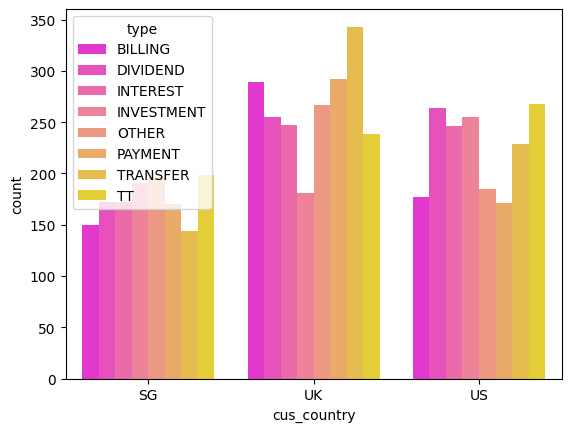

In [ ]:
# Customers from SG had the most TT transactions, UK - TRANSFER, US - TT
sns.countplot(x='cus_country', hue='type', data=df, palette='spring')

<Axes: xlabel='year', ylabel='count'>

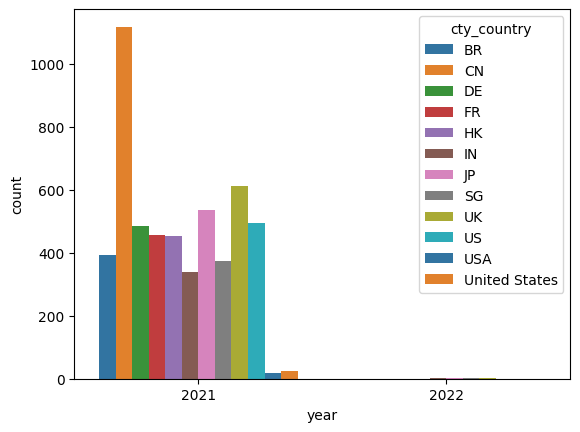

In [ ]:
# In 2022 - only little amount of transactions had been done, in 2021 - the most were for counterparty from China
sns.countplot(x='year', hue='cty_country', data=df, palette='tab10')

In [ ]:
# The most transactions have been done in currenct GBP
cut_counts = df['ccy'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)
fig.show()

<Axes: xlabel='month'>

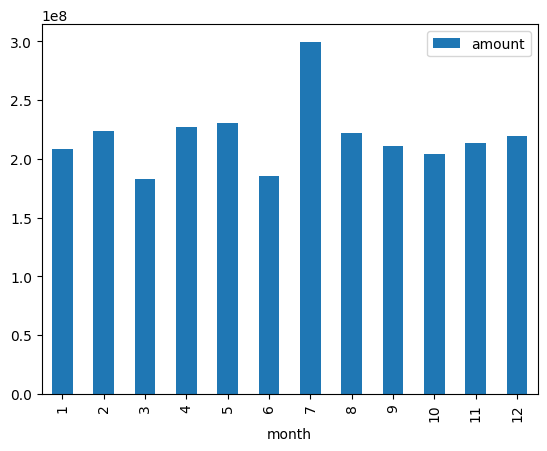

In [ ]:
# In July transactions for the highest amount of approximately 300M have been done
group_time = df.groupby(by=["month"]).aggregate({"amount":"sum"})
group_time.plot(kind='bar')

In [ ]:
# Change categorical type of target column to numerical
df['fraud'] = df['fraud'].replace('N', 0).replace('Y', 1)
df.head()

,cus_country,fraud,cty_country,type,ccy,amount,year,month,day
0,UK,0,CN,OTHER,JPY,48625,2021,3,20
1,UK,0,CN,PAYMENT,GBP,20637,2021,5,2
2,UK,0,CN,PAYMENT,USD,56691,2021,5,23
3,UK,0,CN,PAYMENT,CNY,343864,2021,7,7
4,UK,0,CN,PAYMENT,USD,57247,2021,9,2


[]

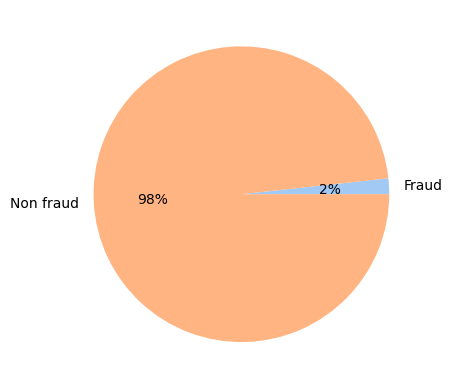

In [ ]:
# Based on below countplot for fraud column, dataset is not well balanced (2% vs 98%)
fraud = (df[df['fraud'] == 1]).count()
non_fraud = (df[df['fraud'] == 0]).count()
data = [fraud[0], non_fraud[0]]
colors = sns.color_palette('pastel')
labels = ['Fraud', 'Non fraud']
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.plot()

In [ ]:
print('Non fraud:', round(df['fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non fraud: 98.28 % of the dataset
Frauds: 1.72 % of the dataset


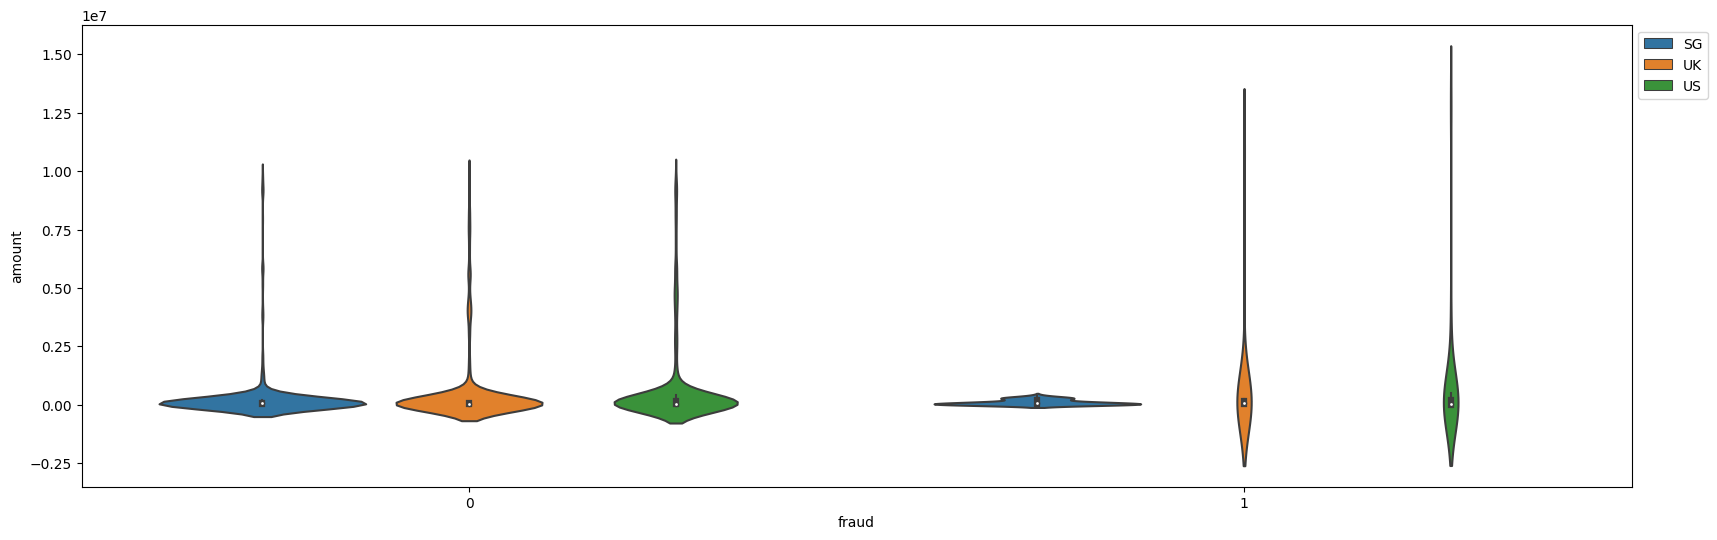

In [ ]:
# Violin plots for fraud, amount and customer country (the most outliers in terms of amount for fraud transactions from UK and US, the least for fraud transactions from SG)
plt.figure(figsize=(20,6))
v = sns.violinplot(x='fraud', y='amount', data=df, hue='cus_country')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# The lower the amount, the most probable is that the transaction will be fraud
print('Percentage of fraud in amount above 400000:')
above_400K = df[(df['amount'] >= 400000)]
above_400K_fraud = df[(df['amount'] >= 400000) & (df['fraud'] == 1)]
print(len(above_400K_fraud)/len(above_400K)*100)

print('Percentage of fraud in amount below 400000:')
below_400K = df[(df['amount'] < 400000)]
below_400K_fraud = df[(df['amount'] < 400000) & (df['fraud'] == 1)]
print(len(below_400K_fraud)/len(below_400K)*100)

Percentage of fraud in amount above 400000:
1.4388489208633095
Percentage of fraud in amount below 400000:
1.7581940525287605


<Axes: >

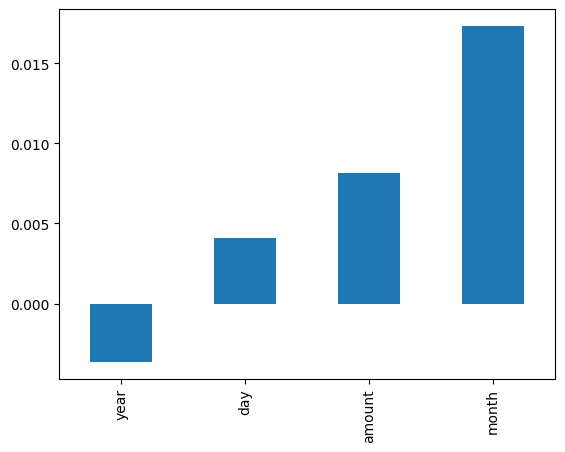

In [ ]:
# The correlation between numerical columns and target column (fraud), the highest correlation for month
df['fraud'] = df['fraud'].astype(np.int32)
num_cols = ['fraud', 'amount', 'year', 'month', 'day']
df[num_cols].corr()['fraud'][1:].sort_values().plot(kind = 'bar')

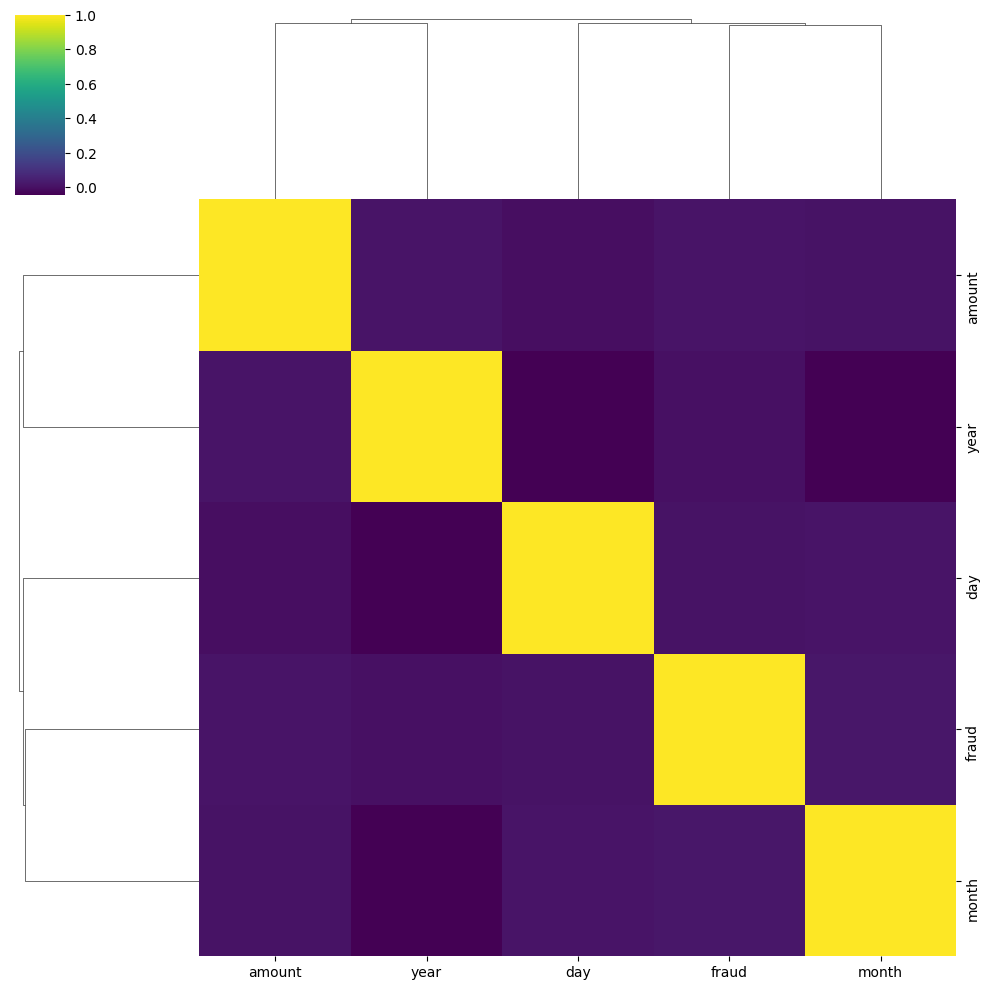

In [ ]:
# Clustemap for all columns
sns.clustermap(df.corr(), cmap = 'viridis')

* Clustermap displays hierachical clustering. It is a method of grouping data based on similarity.
* Based on above, the most similar columns are month/fraud and amount/year at first level.

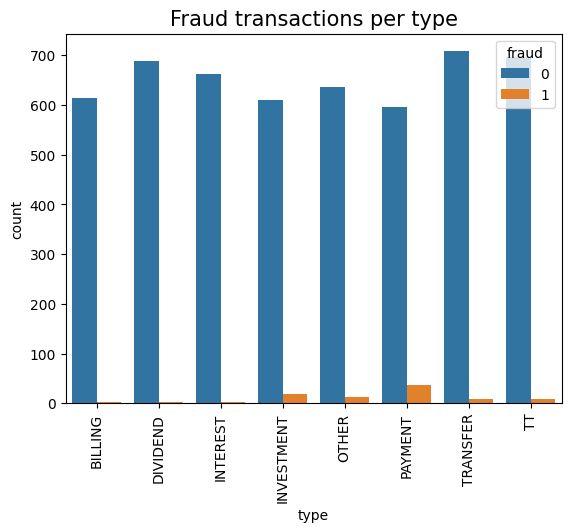

In [ ]:
# The most fraud transactions had type PAYMENT, the least - BILLING, DIVIDEND and INTEREST
sns.countplot(x='type', hue='fraud', data = df)
plt.title('Fraud transactions per type', fontsize=15, color='black')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Fraud transactions per month')

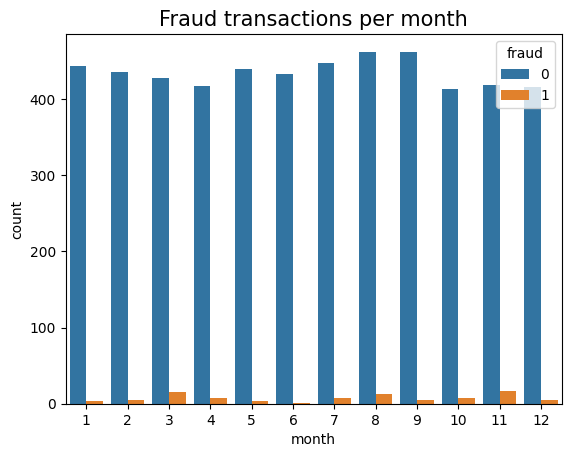

In [ ]:
# The most fraud transactions have been done in March and November, the least in June
sns.countplot(x='month', hue='fraud', data = df)
plt.title('Fraud transactions per month', fontsize=15, color='black')

array([<Axes: title={'center': 'amount'}>], dtype=object)

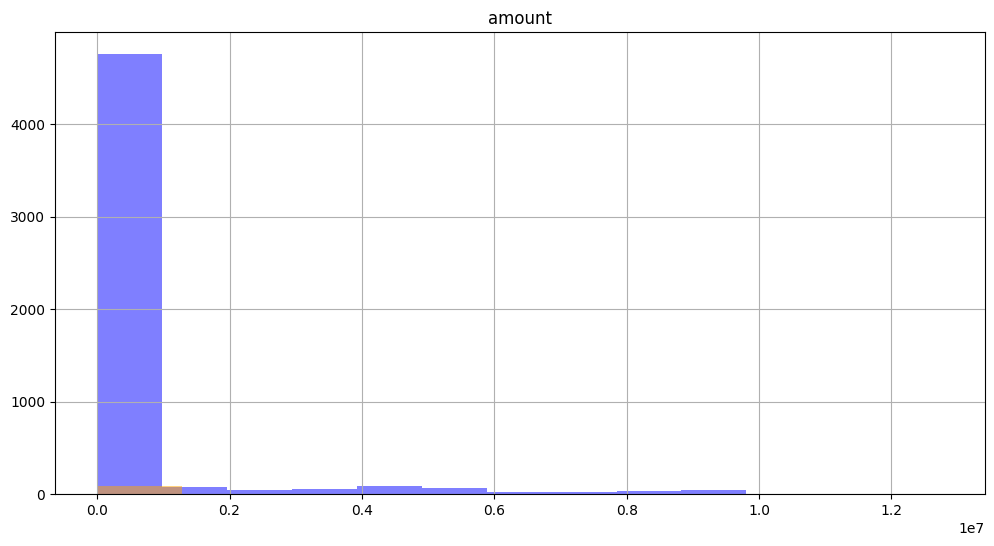

In [ ]:
# The highest amount of transaction - the less probable is the fraud
# The most non fraud transactions have been done for amount to 1M
# The most fraud transactions have been done for amount to 1.2M
numerical_features = ['amount']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
df[df['fraud'] == 0][numerical_features].hist(color='blue', alpha=0.5, ax = ax)
df[df['fraud'] == 1][numerical_features].hist(color='orange', alpha=0.5, ax = ax)

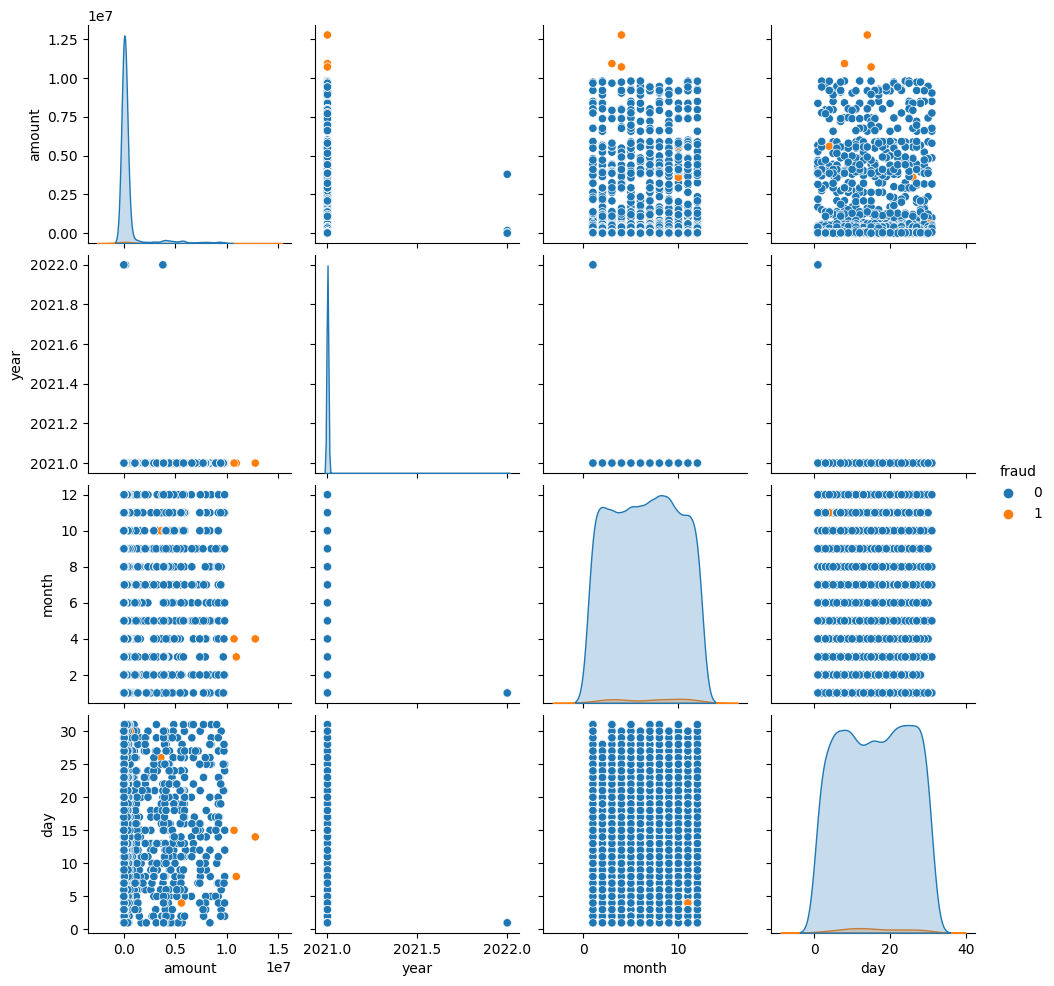

In [ ]:
# Pairplot for all numerical columns with fraud as hue
sns.pairplot(df, hue = 'fraud')

<Axes: xlabel='amount', ylabel='Density'>

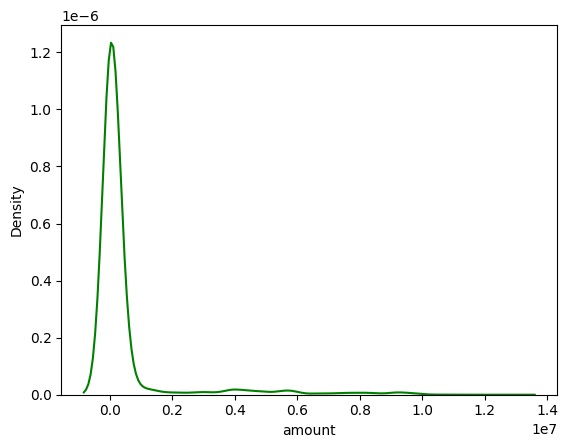

In [ ]:
# Most of transactions had amount till 2000000
sns.kdeplot(df['amount'], color='green')

**Outliers** - due to small amount of data no outliers will be removed from the dataset.

Additionally, according to IQR method for outliers, there will be no outliers for numerical column - amount.



# **Modelling preparation**

In [ ]:
# Retrieving columns which will represent independent/dependent variables
X = df.drop(['fraud'], axis = 1)
y = df[['fraud']]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 111)

In [ ]:
# Feature engineering
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [ ]:
# Verify categorical and numerical attributes content
print('Numerical attributes:', num_attr)
print('Categorical attributes:', cat_attr)

Numerical attributes: Index(['amount', 'year', 'month', 'day'], dtype='object')
Categorical attributes: Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object')


In [ ]:
# Pipelines for different column types and overall pipeline
num_pipeline = Pipeline(
    [
      ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('ohe', OneHotEncoder(sparse=False))
    ]
)

cat_num_pipeline = ColumnTransformer(
    [
        ('numerical', num_pipeline, num_attr),
        ('categorical', cat_pipeline, cat_attr)
    ]
)

As mentioned earlier, the dataset is extremely imbalanced.

The common technique of applying **SMOTE** to the data to over-sample the minority class will be used, without applying any under-sampling.

Next, the fit_resample() function will be run on X_train and y_train data - not on the whole X and y datasets.

The test data needs to reflect how it will appear in the real world, where the classes can not be balanced.

In this case, **SMOTENC** technique will be used to deal with numerical and categorical features parallelly.


In [ ]:
# Smotenc resampler
resampler = SMOTENC(categorical_features = [0, 1, 2, 3], random_state=111, k_neighbors=2)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

y_train_smote.value_counts()

fraud
0        3647
1        3647
dtype: int64

# **KNN**

In [ ]:
# Model definition
knn_param_grid = [
    {
        "knn__n_neighbors": list(range(1,20))
    }
]

knn_model = Pipeline(
[       ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_knn = GridSearchCV(knn_model, param_grid = knn_param_grid, cv=5, scoring='f1')
grid_model_knn.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             scoring='f1')

In [ ]:
# Best model parameters
knn_neigh = grid_model_knn.best_params_['knn__n_neighbors']
knn_neigh

1

In [ ]:
# Model definition with 1 recommended neighbor
model_1 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors = knn_neigh))
    ]
)

In [ ]:
# Best model fitting
model_1.fit(X_train_smote,y_train_smote)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

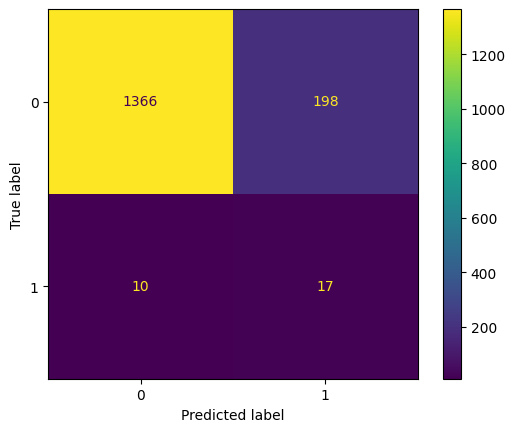

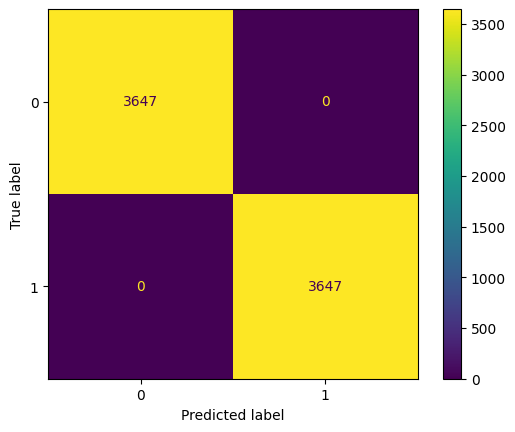

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_1.predict(X_test)
y_pred_tr = model_1.predict(X_train_smote)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_1, X_train_smote, y_train_smote)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1564
           1       0.08      0.63      0.14        27

    accuracy                           0.87      1591
   macro avg       0.54      0.75      0.53      1591
weighted avg       0.98      0.87      0.92      1591



In [ ]:
# Classification report for train set
print(classification_report(y_train_smote, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3647
           1       1.00      1.00      1.00      3647

    accuracy                           1.00      7294
   macro avg       1.00      1.00      1.00      7294
weighted avg       1.00      1.00      1.00      7294



In [ ]:
# Gather some metrics for future comparison of models performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Row with model
row_1 = {'model': 'KNN with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),
    }

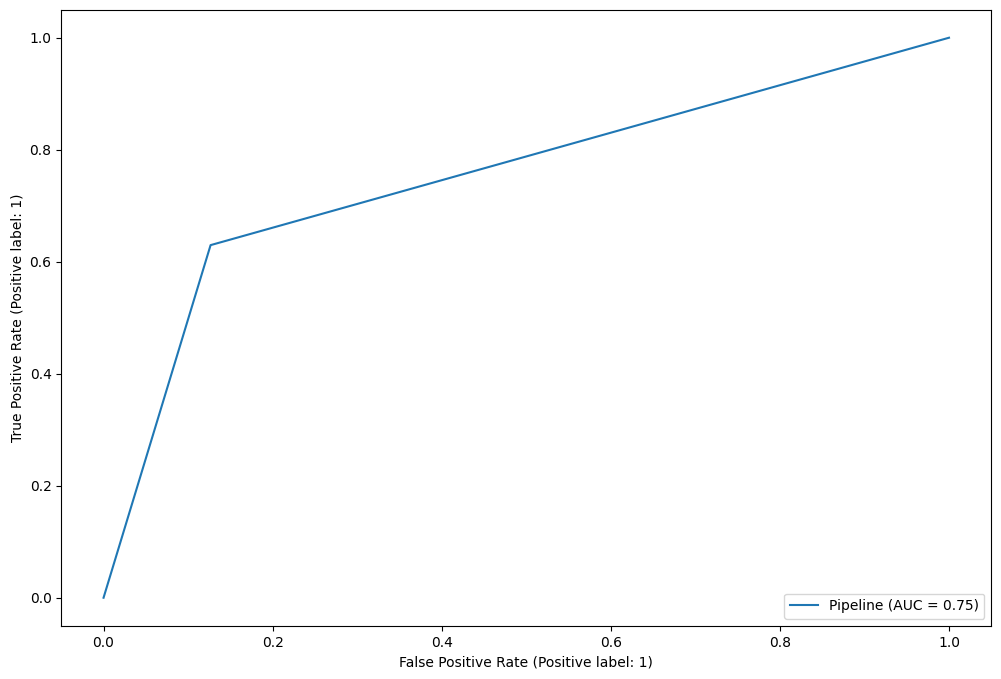

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax = ax)
plt.show()

* AUC is 0.75 which means that there is a 75% chance that the model will be able to distinguish between positive class and negative class.

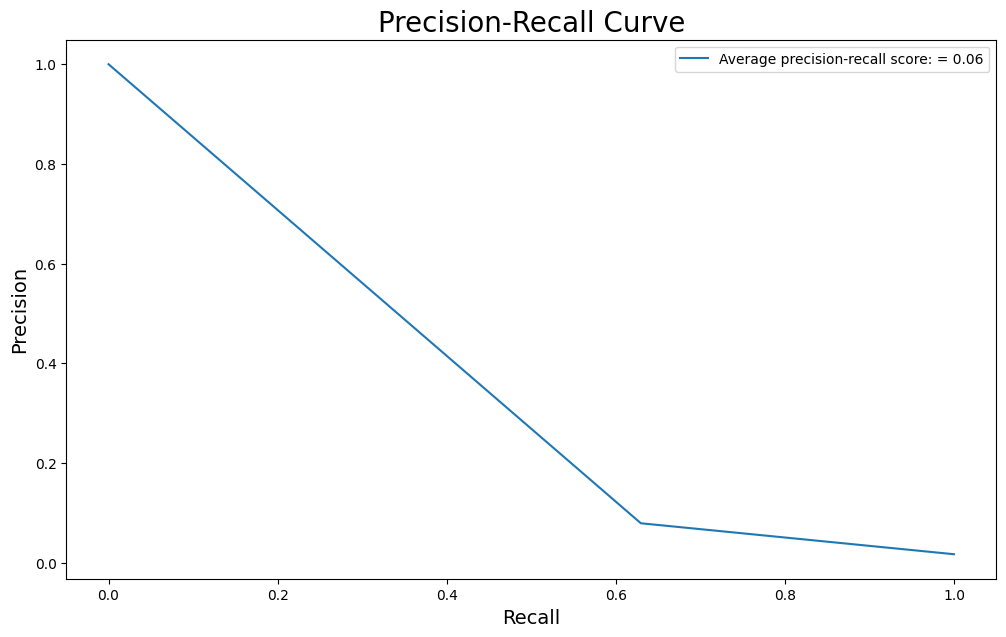

In [ ]:
# Precision-Recall curve
y_scores = model_1.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'Average precision-recall score: = {average_precision:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

# **Decision Tree**

In [ ]:
# Model definition
tree_param_grid = [{"model__criterion": ['gini', 'entropy'],
              "model__max_depth": [2, 3, 4, 5],
              "model__max_leaf_nodes": [2, 3, 4, 5],
              "model__min_samples_leaf": range(1, 5)
              }]
tree_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', DecisionTreeClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_2 = GridSearchCV(tree_model, param_grid = tree_param_grid, verbose=1, n_jobs=1, cv=5, scoring='f1')
grid_model_2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 3, 4, 5],
                          'model__max_leaf_nodes': [2, 3, 4, 5],
                          'model__min_samples_leaf': range(1, 5)}],
             scoring='f1', verbose=1)

In [ ]:
# Best model parameters
tree_criterion = grid_model_2.best_params_['model__criterion']
tree_depth = grid_model_2.best_params_['model__max_depth']
tree_leaf_max = grid_model_2.best_params_['model__max_leaf_nodes']
tree_leaf_min = grid_model_2.best_params_['model__min_samples_leaf']

In [ ]:
# Best model details
model_2 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('tree', DecisionTreeClassifier(criterion=tree_criterion, max_depth=tree_depth, max_leaf_nodes=tree_leaf_max, min_samples_leaf=tree_leaf_min, class_weight='balanced'))
    ]
)

In [ ]:
# Model fitting
model_2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=4,
                                        max_leaf_nodes=5))])

In [ ]:
# Feature names and feature importances
feature_names = model_2[:-1].get_feature_names_out()
feature_imp = model_2['tree'].feature_importances_

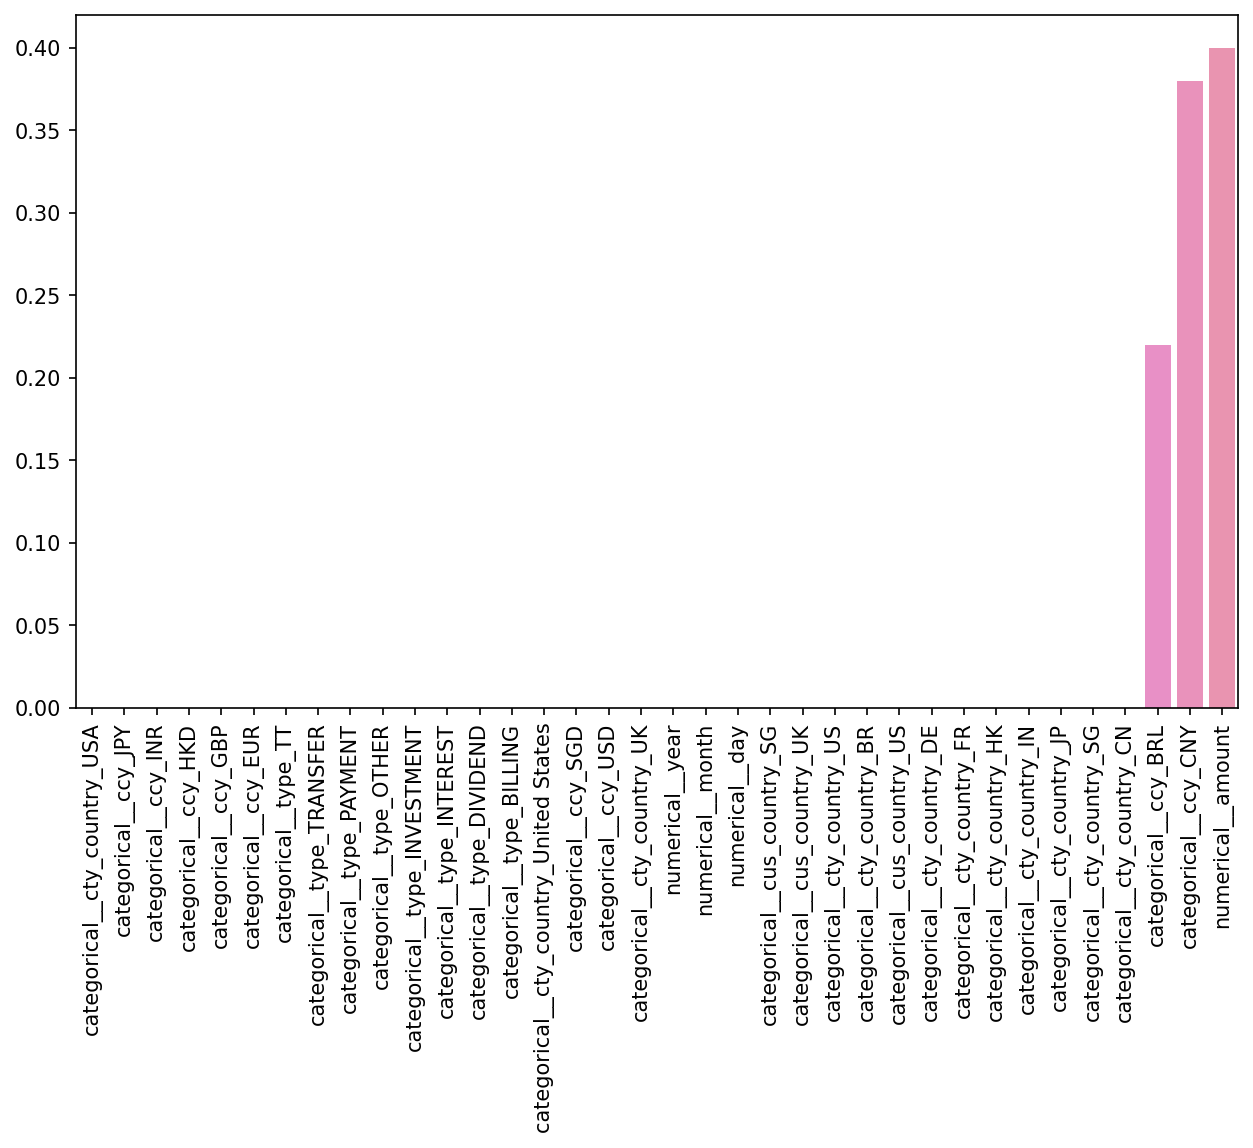

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = feature_names, data = feature_imp)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()


* We can expect the odds of fraud transaction to increase (the original coeff was positive) per unit increase of ccy_BRL, ccy_CNY and amount.
* The amount indicator is the strongest predictor.

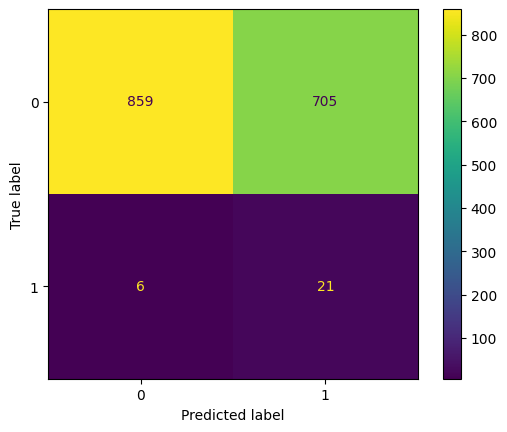

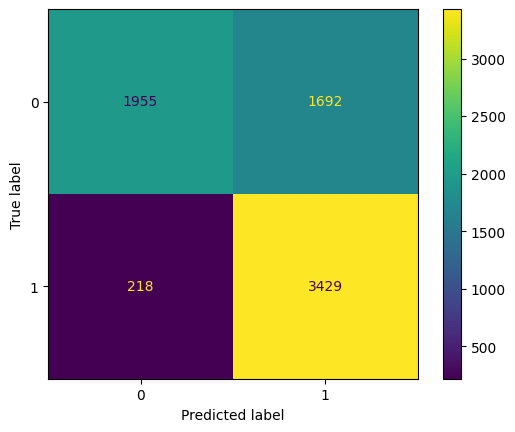

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_2.predict(X_test)
y_pred_tr = model_2.predict(X_train_smote)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_2, X_train_smote, y_train_smote)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1564
           1       0.03      0.78      0.06        27

    accuracy                           0.55      1591
   macro avg       0.51      0.66      0.38      1591
weighted avg       0.98      0.55      0.70      1591



In [ ]:
# Classification report for train set
print(classification_report(y_train_smote, y_pred_tr))

              precision    recall  f1-score   support

           0       0.90      0.54      0.67      3647
           1       0.67      0.94      0.78      3647

    accuracy                           0.74      7294
   macro avg       0.78      0.74      0.73      7294
weighted avg       0.78      0.74      0.73      7294



In [ ]:
# Gather some metrics for future comparison of models performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Row with model
row_2 = {'model': 'Decision Tree with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),
    }

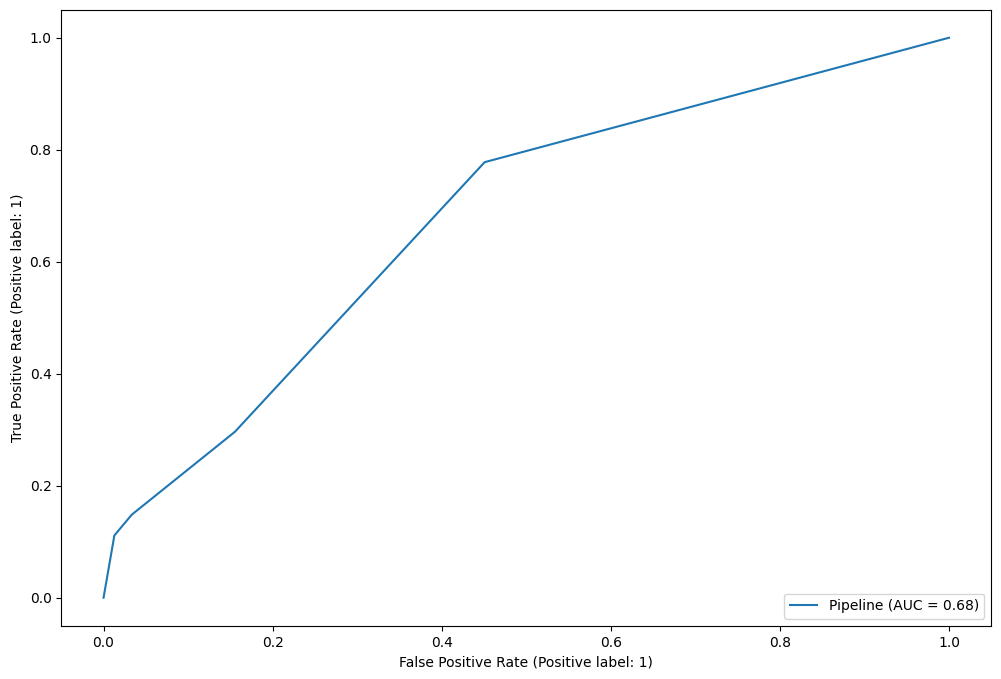

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_2, X_test, y_test, ax = ax)
plt.show()

* AUC is 0.68 which means that there is a 68% chance that the model will be able to distinguish between positive class and negative class.

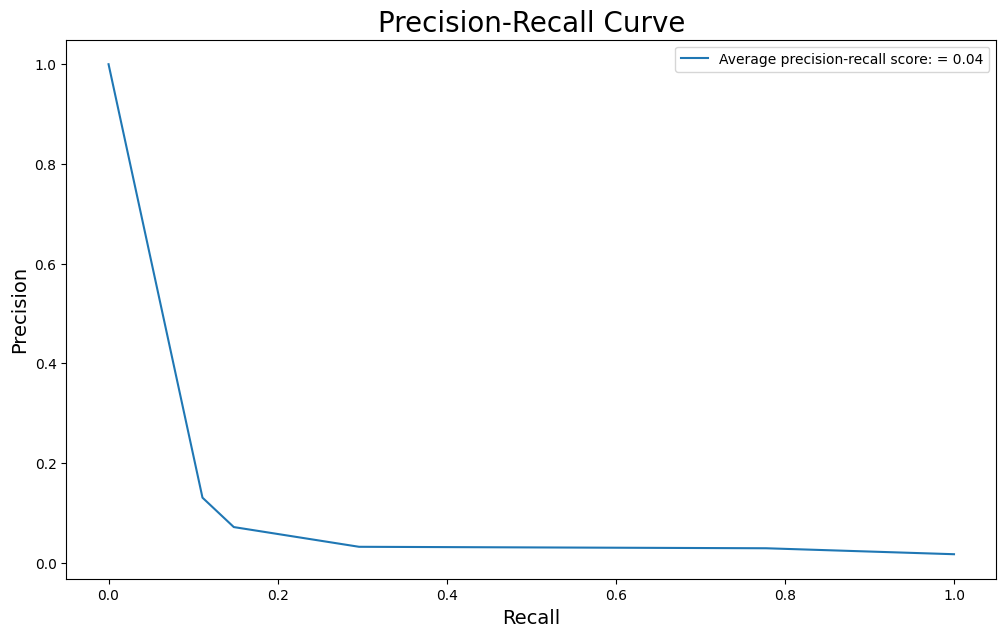

In [ ]:
# Precision-Recall curve
y_scores = model_2.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'Average precision-recall score: = {average_precision:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

# **Random Forest**

In [ ]:
# Model definition
rfc_param_grid = {'rfc__criterion': ['gini', 'entropy', 'log_loss'],
             'rfc__oob_score': [True, False],
            'rfc__max_features': ['sqrt', 'log2']}
rfc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_rfc = GridSearchCV(rfc_model, param_grid = rfc_param_grid, cv=5, scoring='f1')
grid_model_rfc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__oob_score': [True, False]},
             scoring='f1')

In [ ]:
# Best model parameters
rfc_criterion = grid_model_rfc.best_params_['rfc__criterion']
rfc_oob_score = grid_model_rfc.best_params_['rfc__oob_score']
rfc_max_features = grid_model_rfc.best_params_['rfc__max_features']

In [ ]:
# Best model details
model_3 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier(criterion = rfc_criterion, oob_score = rfc_oob_score, max_features = rfc_max_features))
    ]
)

In [ ]:
# Best model fitting
model_3.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                ('rfc', RandomForestClassifier(criterion='entropy'))])

In [ ]:
# Feature names and feature importances
feature_names = model_3[:-1].get_feature_names_out()
feature_imp = model_3['rfc'].feature_importances_

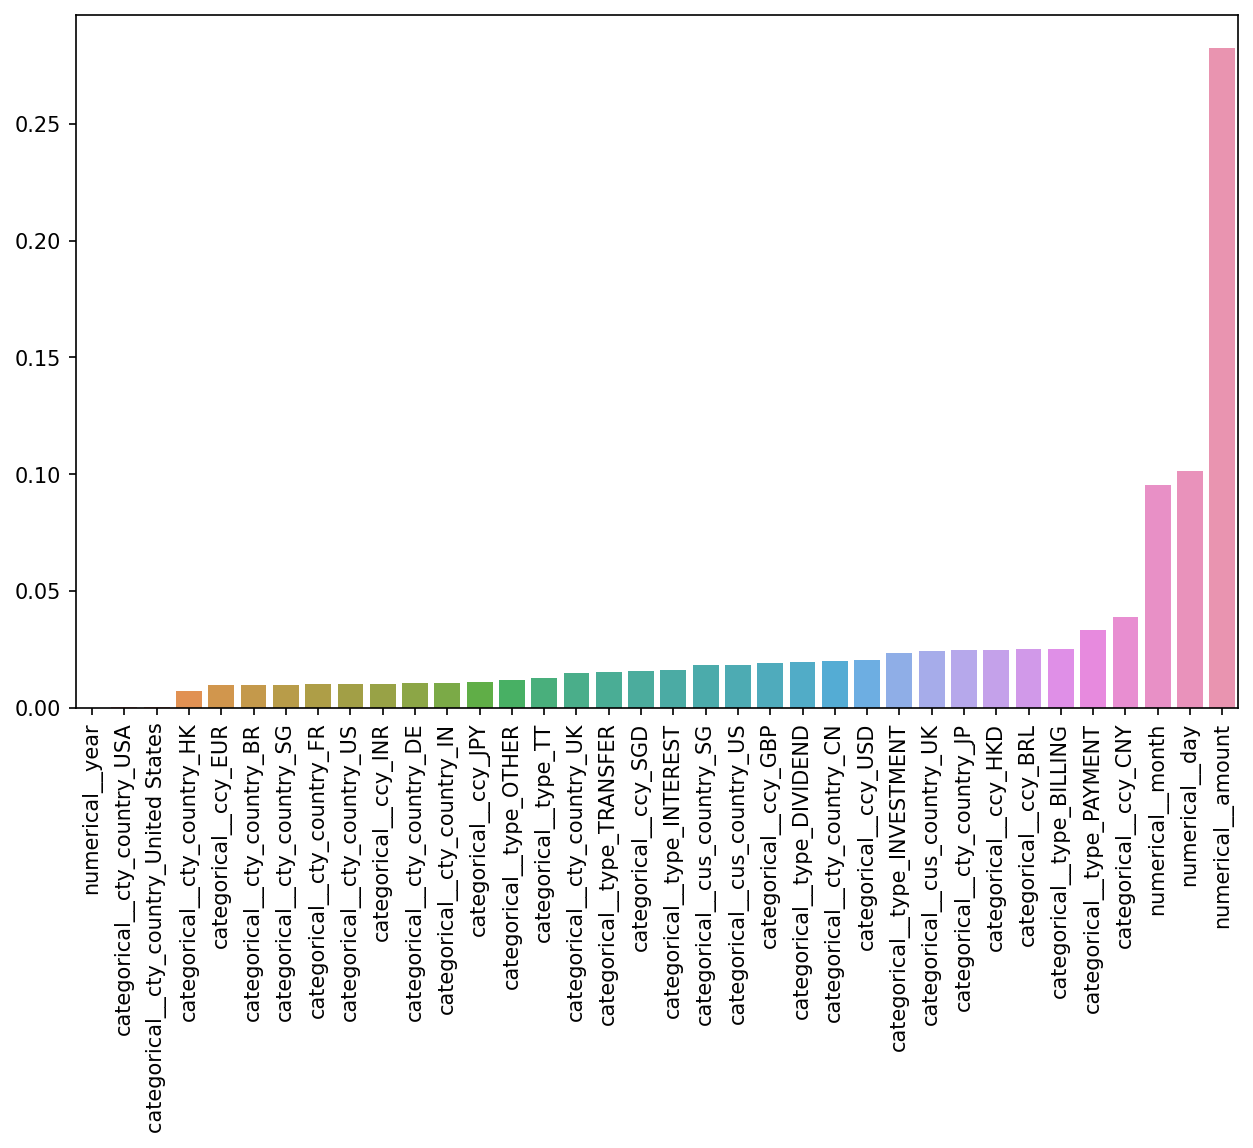

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = feature_names, data = feature_imp)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()


* We can expect the odds of fraid transaction to increase (the original coeff was positive) for almost all features.
* The month, day and amount indicators are the strongest predictors.
* The year, cty_country_USA, cty_country_United_States indicators are the weakest predictors.

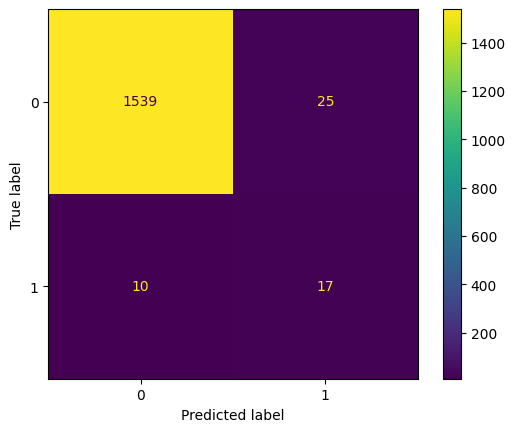

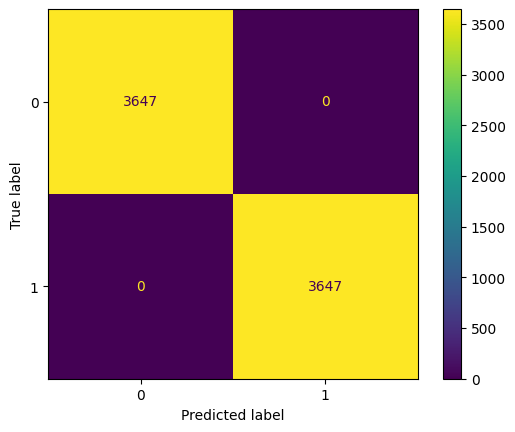

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_3.predict(X_test)
y_pred_tr = model_3.predict(X_train_smote)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_3, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_3, X_train_smote, y_train_smote)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1564
           1       0.40      0.63      0.49        27

    accuracy                           0.98      1591
   macro avg       0.70      0.81      0.74      1591
weighted avg       0.98      0.98      0.98      1591



In [ ]:
# Classification report for train set
print(classification_report(y_train_smote, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3647
           1       1.00      1.00      1.00      3647

    accuracy                           1.00      7294
   macro avg       1.00      1.00      1.00      7294
weighted avg       1.00      1.00      1.00      7294



In [ ]:
# Gather some metrics for future comparison of models performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Row with model
row_3 = {'model': 'Random Forest with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),
    }

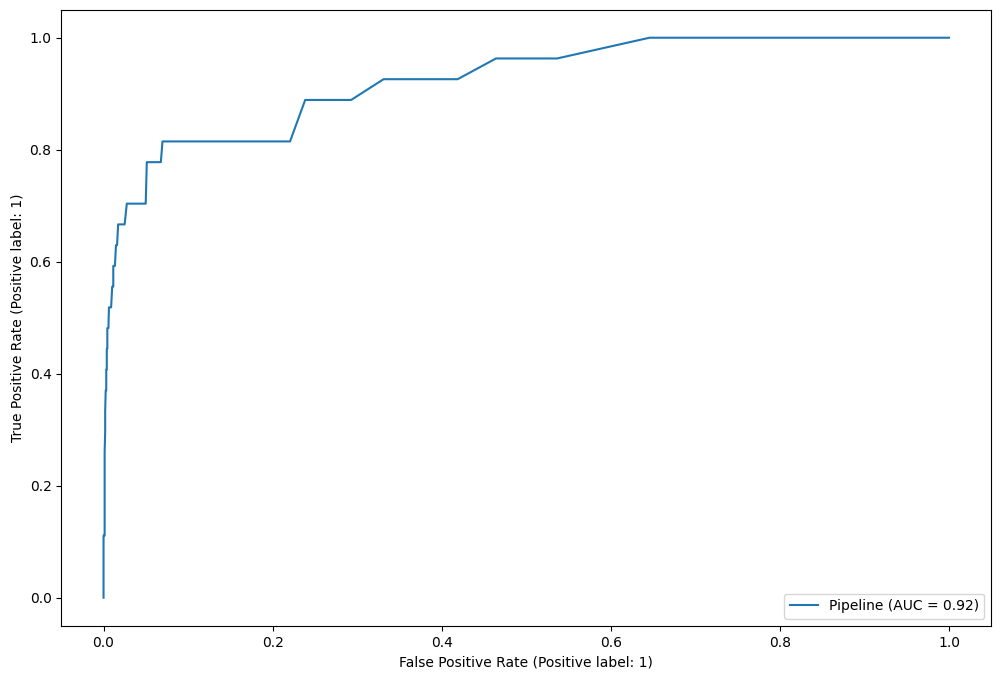

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_3, X_test, y_test, ax = ax)
plt.show()

* AUC is 0.92 which means that there is a 92% chance that the model will be able to distinguish between positive class and negative class.

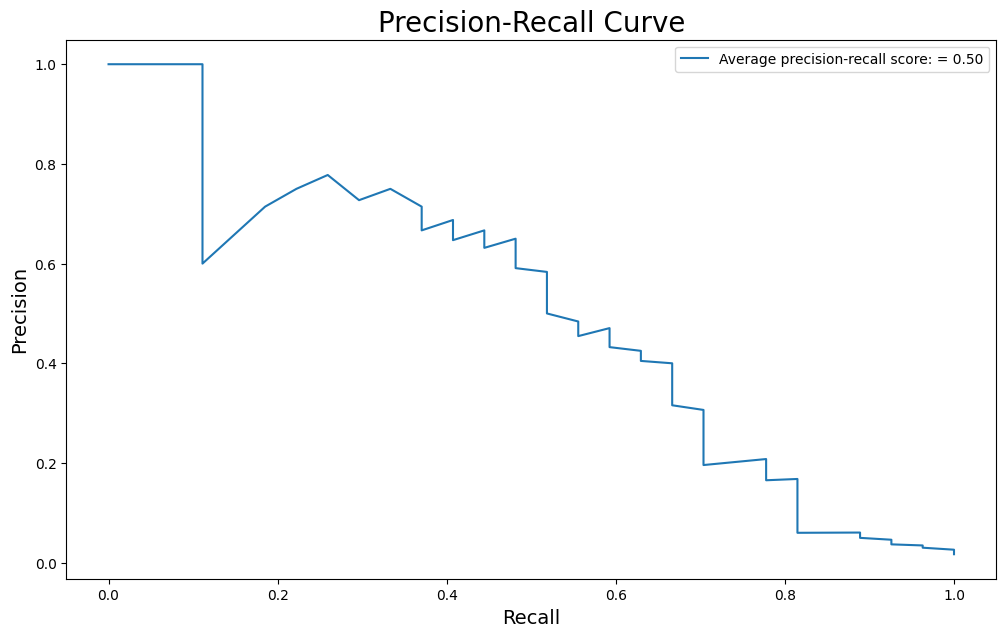

In [ ]:
# Precision-Recall curve
y_scores = model_3.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'Average precision-recall score: = {average_precision:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

# **AdaBoost**

In [ ]:
# Model definition
abc_param_grid = {'abc__learning_rate': [0.1, 0.5, 0.9],
             'abc__algorithm': ['SAMME', 'SAMME.R']}
abc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_abc = GridSearchCV(abc_model, param_grid = abc_param_grid, cv=5, scoring='f1')
grid_model_abc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                                       ('abc', AdaBoostClassifier())]),
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.1, 0.5, 0.9]},
             scoring='f1')

In [ ]:
# Best model parameters
abc_learning_rate = grid_model_abc.best_params_['abc__learning_rate']
abc_algorithm = grid_model_abc.best_params_['abc__algorithm']

In [ ]:
# Best model details
model_4 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier(learning_rate = abc_learning_rate, algorithm = abc_algorithm))
    ]
)

In [ ]:
# Best model fitting
model_4.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                ('abc', AdaBoostClassifier(learning_rate=0.9))])

In [ ]:
# Feature names and feature importances
feature_names = model_4[:-1].get_feature_names_out()
feature_imp = model_4['abc'].feature_importances_

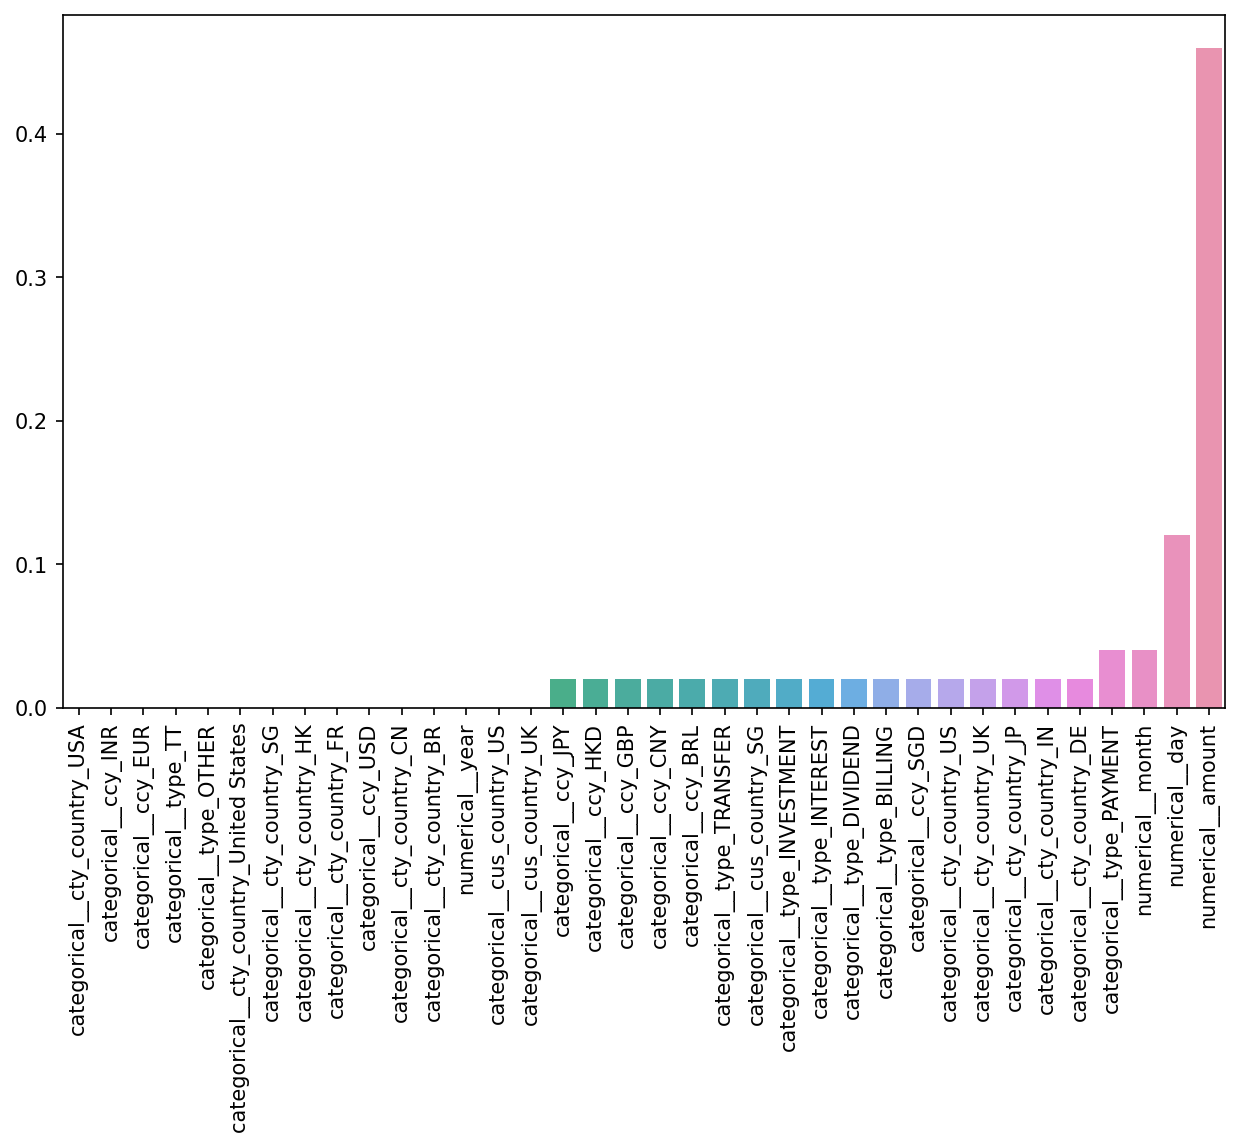

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = feature_names, data = feature_imp)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

* We can expect the odds of fraid transaction to increase (the original coeff was positive) for more than half features.
* We can expect the odds of fraid transaction to remain the same (the original coeff was approximately 0) for features cty_country_USA, ccy_INR, ccy_EUR, type_TT, type_OTHER, cty_country_Unites_States, cty_country_SG, cty_country_HK, cty_country_FR, ccy_USD, cty_country_CN, cty_country_BR, year, cus_country_US and cus_country_UK.
* The month, day and amount indicators are the strongest predictors.


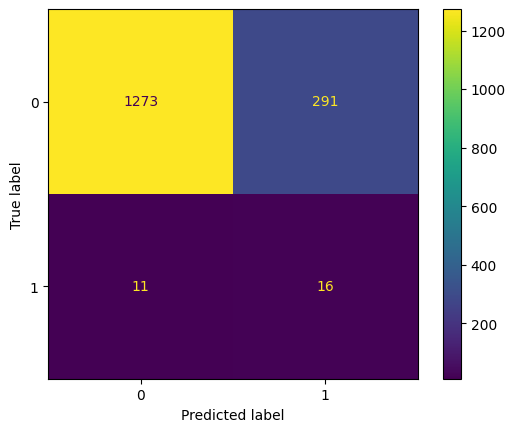

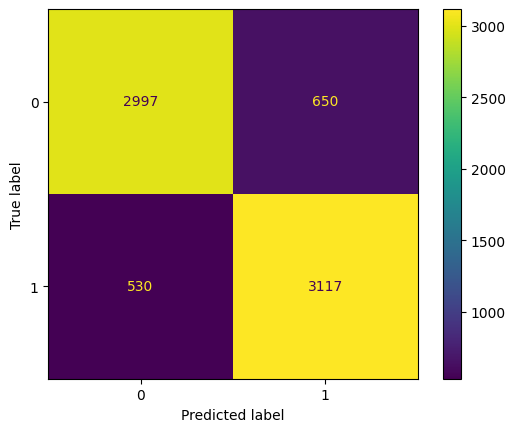

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_4.predict(X_test)
y_pred_tr = model_4.predict(X_train_smote)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_4, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_4, X_train_smote, y_train_smote)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1564
           1       0.05      0.59      0.10        27

    accuracy                           0.81      1591
   macro avg       0.52      0.70      0.49      1591
weighted avg       0.98      0.81      0.88      1591



In [ ]:
# Classification report for train set
print(classification_report(y_train_smote, y_pred_tr))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3647
           1       0.83      0.85      0.84      3647

    accuracy                           0.84      7294
   macro avg       0.84      0.84      0.84      7294
weighted avg       0.84      0.84      0.84      7294



In [ ]:
# Gather some metrics for future comparison of models performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Row with model
row_4 = {'model': 'Ada Boost with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),
    }

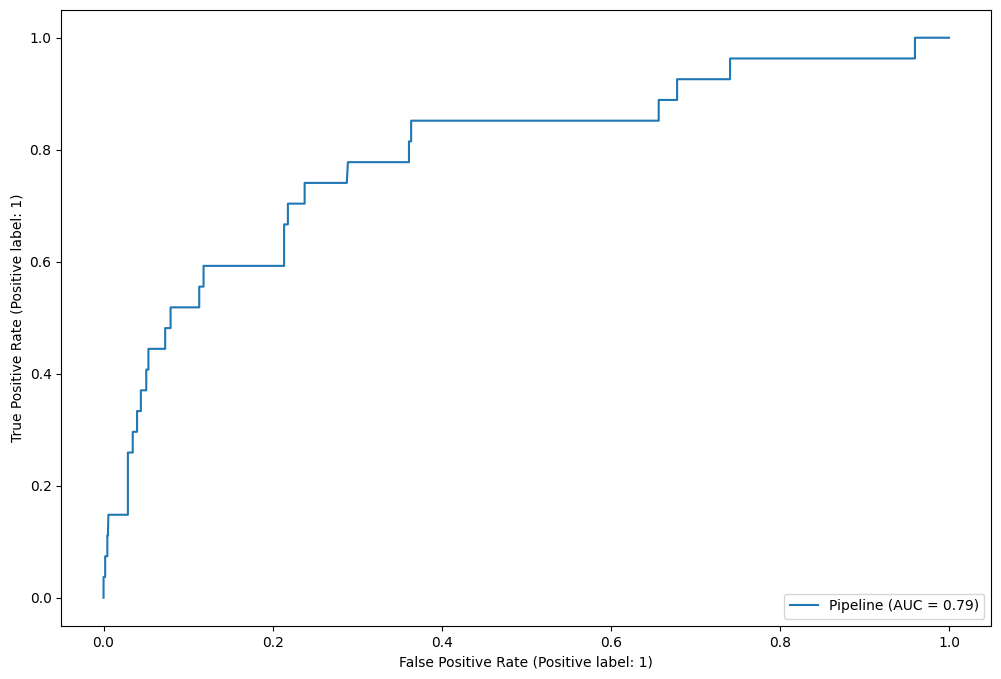

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_4, X_test, y_test, ax = ax)
plt.show()

* AUC is 0.79 which means that there is a 79% chance that the model will be able to distinguish between positive class and negative class.

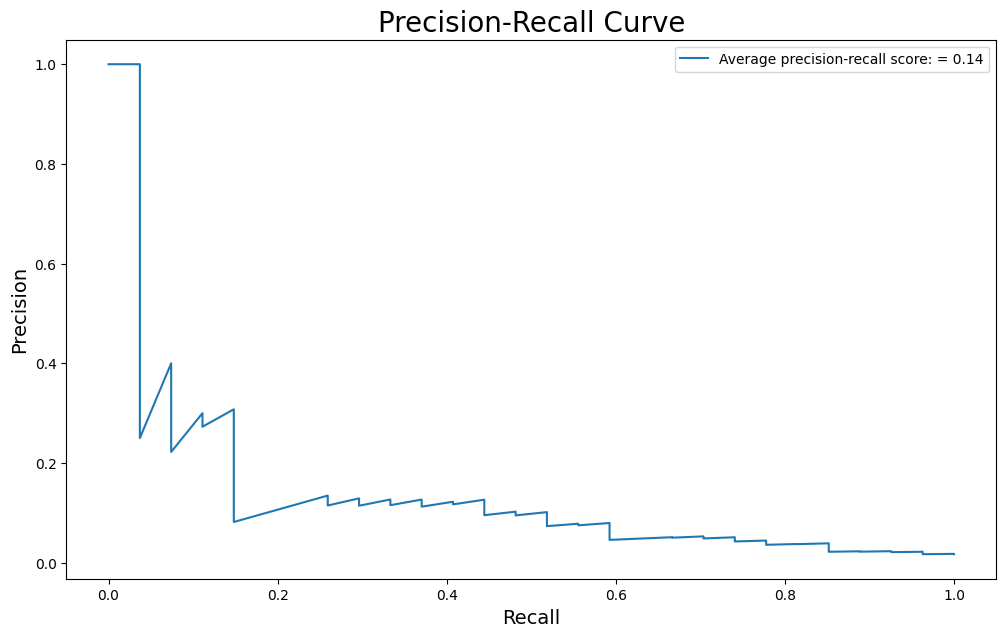

In [ ]:
# Precision-Recall curve
y_scores = model_4.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'Average precision-recall score: = {average_precision:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

# **Gradient Boosting**

In [ ]:
# Model definition
gbc_param_grid = {'gbc__n_estimators': [1,5,10,20,40,100],
             'gbc__max_depth': [3,4,5,6]}
gbc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_gbc = GridSearchCV(gbc_model, param_grid = gbc_param_grid, cv=5, scoring='f1')
grid_model_gbc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__max_depth': [3, 4, 5, 6],
                         'gbc__n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='f1')

In [ ]:
# Best model parameters
gbc_n_estimators = grid_model_gbc.best_params_['gbc__n_estimators']
gbc_max_depth = grid_model_gbc.best_params_['gbc__max_depth']

In [ ]:
# Best model details
model_5 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier(n_estimators=gbc_n_estimators, max_depth = gbc_max_depth))
    ]
)

In [ ]:
# Best model fitting
model_5.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cus_country', 'cty_country', 'type', 'ccy'], dtype='object'))])),
                ('gbc', GradientBoostingClassifier(max_depth=6))])

In [ ]:
# Feature names and feature importances
feature_names = model_5[:-1].get_feature_names_out()
feature_imp = model_5['gbc'].feature_importances_

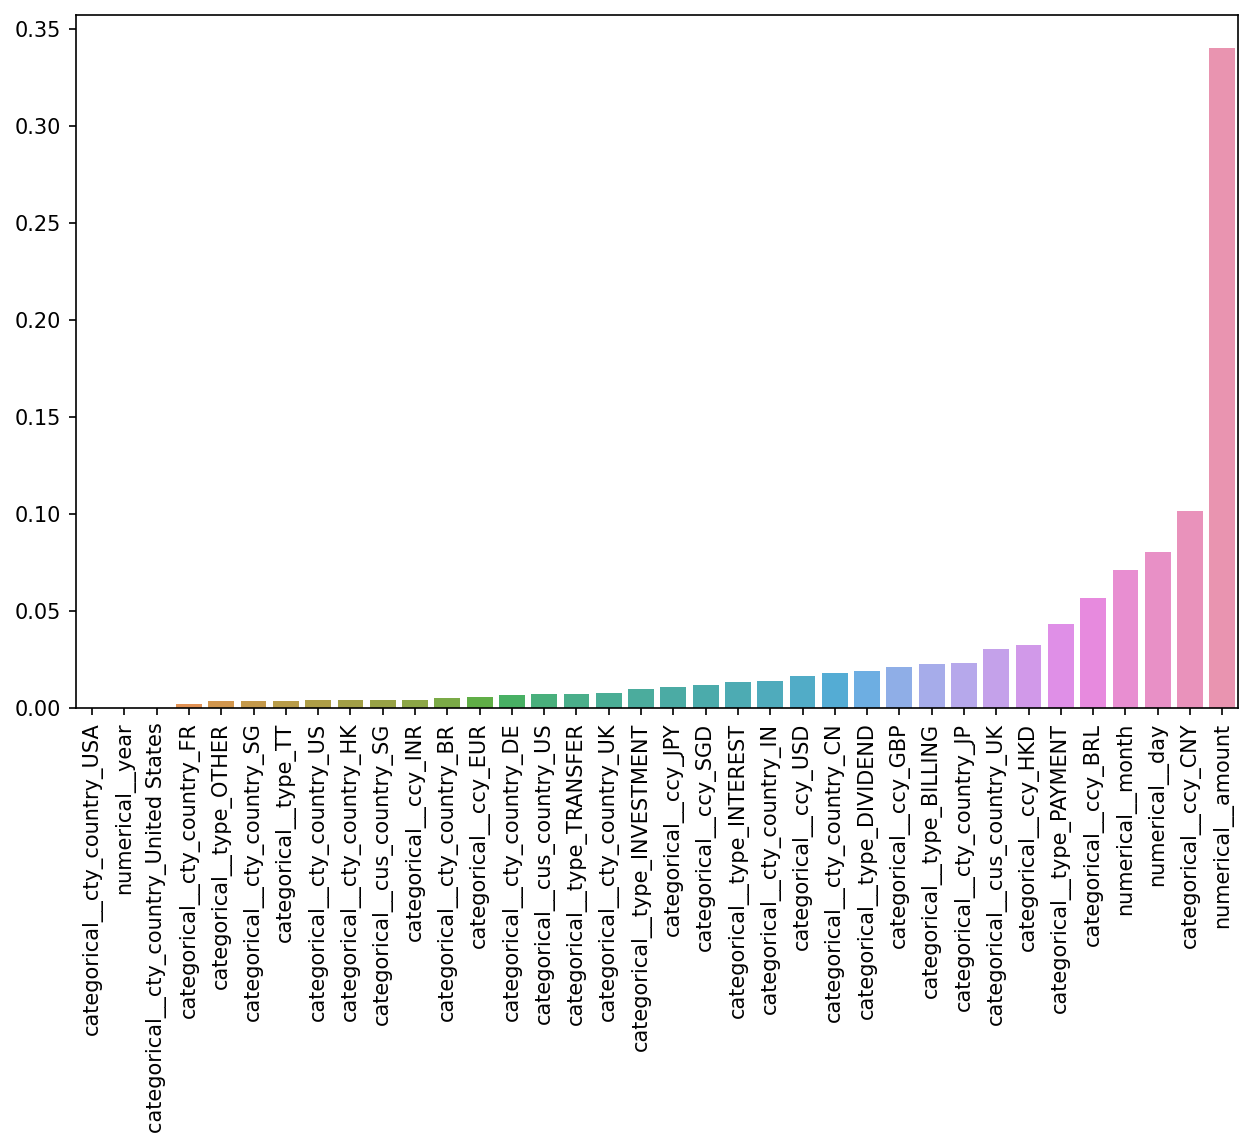

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = feature_names, data =feature_imp)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()


* We can expect the odds of fraid transaction to increase (the original coeff was positive) for almost all features.
* The day, ccy_CNY and amount indicators are the strongest predictors.
* The year, cty_country_USA, cty_country_United_States indicators are the weakest predictors.

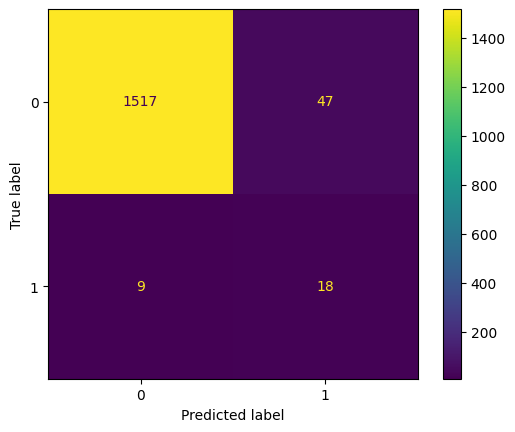

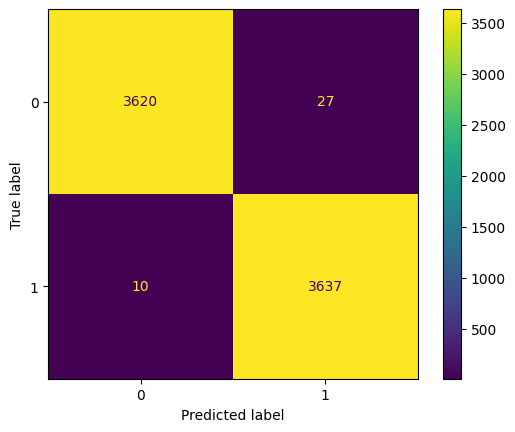

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_5.predict(X_test)
y_pred_tr = model_5.predict(X_train_smote)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_5, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_5, X_train_smote, y_train_smote)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1564
           1       0.28      0.67      0.39        27

    accuracy                           0.96      1591
   macro avg       0.64      0.82      0.69      1591
weighted avg       0.98      0.96      0.97      1591



In [ ]:
# Classification report for train set
print(classification_report(y_train_smote, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3647
           1       0.99      1.00      0.99      3647

    accuracy                           0.99      7294
   macro avg       0.99      0.99      0.99      7294
weighted avg       0.99      0.99      0.99      7294



In [ ]:
# Gather some metrics for future comparison of models performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Row with model
row_5 = {'model': 'Gradient Boosting with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),
    }

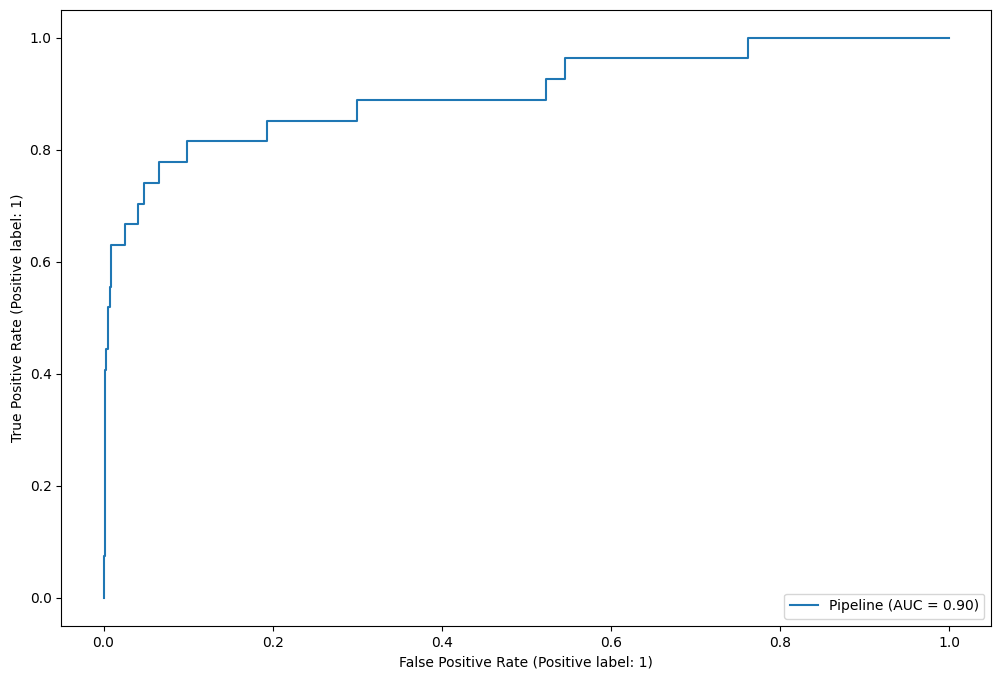

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_5, X_test, y_test, ax = ax)
plt.show()

* AUC is 0.90 which means that there is a 90% chance that the model will be able to distinguish between positive class and negative class.

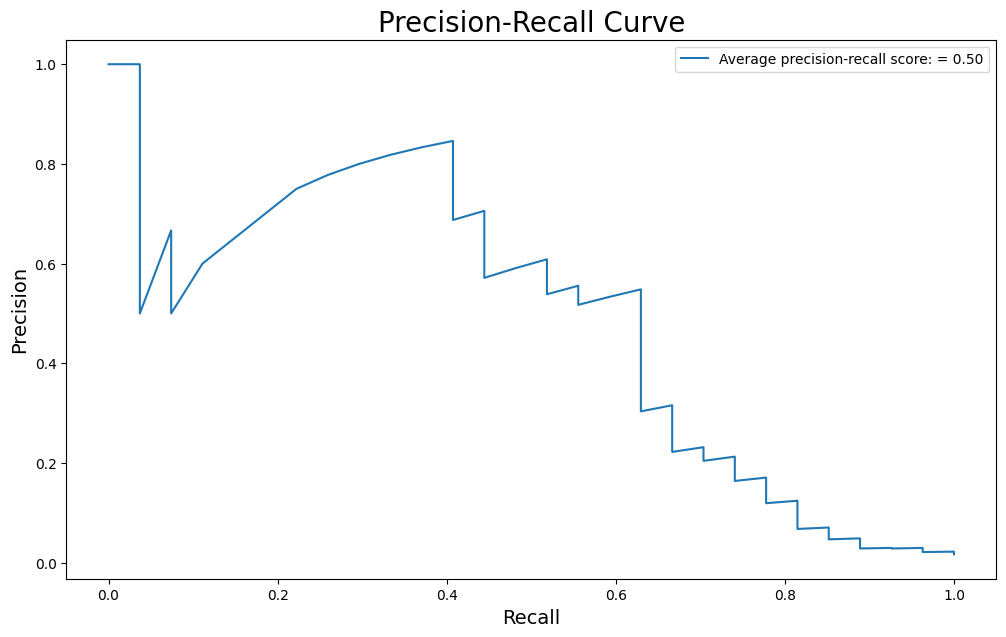

In [ ]:
# Precision-Recall curve
y_scores = model_5.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'Average precision-recall score: = {average_precision:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

# **Model summary**

In [ ]:
# Add all results to dataframe
results = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])
results = results.append(row_1, ignore_index=True)
results = results.append(row_2, ignore_index=True)
results = results.append(row_3, ignore_index=True)
results = results.append(row_4, ignore_index=True)
results = results.append(row_5, ignore_index=True)
results

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,KNN with SMOTE,17,1366,198,10,1383,208,0.869265,0.079070,0.629630,0.140496,0.751516,0.056
1,Decision Tree with SMOTE,21,859,705,6,880,711,0.553111,0.028926,0.777778,0.055777,0.663505,0.026
2,Random Forest with SMOTE,17,1539,25,10,1556,35,0.978001,0.404762,0.629630,0.492754,0.806822,0.261
3,Ada Boost with SMOTE,16,1273,291,11,1289,302,0.810182,0.052117,0.592593,0.095808,0.703266,0.038
4,Gradient Boosting with SMOTE,18,1517,47,9,1535,56,0.964802,0.276923,0.666667,0.391304,0.818308,0.190


# **General remarks**

* All the models have been trained on train dataset.
* Thanks to above we are able to verify model's performance by using it to predict the outcome from the test dataset, for which it has not previously seen the answers.
* The dataset is extremely imbalanced, therefore accuracy is not recommended as a performance measure.
* In this case, if a model predicted the minority class every time, it would still reach 98.28% accuracy, which supposed to be good, but it completely fails to detect any fraudulent transactions, defeating the object of the task entirely.
* The AUC/ROC is commonly used to evaluate classification models. It it highly recommended on imbalanced data because it takes into account the true positive rate and the true negative rate.
* The best model should have a lot of tp (true positive) cases with low amount of fp (false positive) simultaneously.
* Average precision should be also taken into account when choosing the best model. Precision is the ration of true positives over the true positives + true negatives.



# **More detailed remarks**
* Based on above summary table, KNN model has a roc_auc of 0.75 and identifies 17 fraudulent transactions (tp) and misses 10 (fn), while incorrectly flagging 198 as fraudulent (fp).
* Decision Tree model performs worse, with a roc_auc of 0.66, correctly identifies 21 fraudulent transactions (tp), misses 6 (fn), while incorrectly flagging 705 as fraudulent (fp).
* Random Forest model performs quite well, with a roc_auc of 0.80, correctly identifies 17 fraudulent transactions (tp), misses 10 (fn), while incorrectly flagging 25 as fraudulent (fp).
* Ada Boost model performs similarily, with a roc_auc of 0.70, correctly identifies 16 fraudulent transactions (tp), misses 11 (fn), while incorrectly flagging 291 as fraudulent (fp).
* The last model, Gradient Boosting performs the best regarding roc_auc 0f 0.81, correctly identifies 18 fraudulent transactions (tp), misses 9 (fn) and incorrecly flags 47 as fraudulent (fp).
* The best avg_pre has Random Forest model an the worst Decision Tree model.
* Among all models, best results for test set for other metrics had: Random Forest (accuracy, precision and F1 score) and  Decision Tree (recall).
* For train sets, all models have achieved good results. The difference between train and test results is huge. It suggested that the models are overfitted. The reason of this phenomenon is that the original dataset is undersampled and the model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases.

# **Conclusion**

* Taking above into consideration, model **Random Forest** will be target due to its high and stable performance on train and test data in context of all parameters.
* It has achieved the best results for roc_auc and f1 metrics which seem to be the most important for imbalanced dataset.
* Additionally, it had the lowest amount of false positive cases.
* **Random Forest** model correctly identified 17 of 27 fraudulent transactions from within the data set of 5300 transactions, while only incorrectly flagging 25 transactions as fraud when they were genuine.
* Based on an average amount value of 590,105.56 per fraudulent transaction, chosen model saved around 10,031,794.52 in the considered period of time.
* Probably, the change of oversampling method or model type will result in better performance.
* Different approach regarding the most suitable metrics for the considered problem will likely make a difference.
* Presumably, gathering more data for fraud transactions and further hyperparameters tuning will lead to better performance.